# Práctica Machine Learning.
## Alumno: Juan Antonio Roldán Paco


## Tarea
Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos
disponibles. Se valorará:


• Generación de nuevas características a partir de las existentes

• Codificación de variables

• Análisis exploratorio

• Selección y evaluación del modelo

• Comparativa de distintos algoritmos


### Importamos las librerías necesarias.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt # para dibujar
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### Separamos los datos 80% para train y 20% para test.

In [2]:
from sklearn.model_selection import train_test_split
full_df = pd.read_csv('./data/airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)
train.to_csv('./data/train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/test.csv', sep=';', decimal='.', index=False)

In [3]:
df_train = pd.read_csv('./data/train.csv', sep=';', decimal='.')
df_test = pd.read_csv('./data/test.csv', sep=';', decimal='.')
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


### Observamos que tiene el dataset de train.

In [4]:
df_train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/74652419/f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/74652419/f...,31124866,https://www.airbnb.com/users/show/31124866,Inava,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/users/31124866/prof...,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,2017-04-08,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://a0.muscache.com/im/pictures/1565a3a9-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1565a3a9-2...,85301317,https://www.airbnb.com/users/show/85301317,Apartamentos Turísticos,2016-07-22,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/ff7ad016-4...,https://a0.muscache.com/im/pictures/ff7ad016-4...,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,280

In [5]:
datos = df_train.dtypes
datos

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

### Vamos a eliminar algunas columnas que no creo que aporten nada

Voy a eliminar los id, los url y las fechas ya que creo que no me van a aportar nada en mi modelo

In [6]:
df_train.drop(['ID', 'Listing Url','Scrape ID','Last Scraped', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Since', 'Host Response Time', 'Host Thumbnail Url', 'Host Picture Url' , 'Calendar Updated', 'First Review', 'Last Review','Calendar last Scraped'], axis=1, inplace=True)

In [7]:
df_train.head()

,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Host Name,Host Location,Host About,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,Inava,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,100.0,NaN,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,NaN,9,32,52,117,12,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",Hora llegada: a partir de las 15:00 horas Hora...,"Acceso a todos los medios de trasporte, BUS, M...",NaN,Estimado huésped estaremos disponible todo el ...,- Oír música con volumen moderado. Entrada a p...,Apartamentos Turísticos,"Madrid, Community of Madrid, Spain",Somos una empresa de turismo dedicada al aloj...,100.0,NaN,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,50.0,NaN,NaN,NaN,15.0,1,0,1,1125,NaN,15,39,64,208,20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,NaN,羚羊Casa出发 --地铁Metro 5号线vsita alegre--opera转乘2号线...,NaN,NaN,NaN,玲,"Madrid, Community of Madrid, Spain","Our hotel near the city center, next to the su...",100.0,NaN,Carabanchel,16.0,16.0,"email,phone,facebook,google,reviews,jumio,gove...","Carabanchel, Madrid, Comunidad de Madrid 28025...",Carabanchel,Vista Alegre,Carabanchel,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",ES,Spain,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,"Internet,Wireless Internet,Wheelchair accessib...",NaN,10.0,NaN,NaN,NaN,5.0,1,0,3,30,NaN,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profi

### Vamos a buscar si alguna columna tiene muchos NA

In [8]:
dato =df_train.isna().sum ()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Name                                  1
Summary                             469
Space                              3106
Description                           6
Experiences Offered                   0
Neighborhood Overview              4515
Notes                              7281
Transit                            4581
Access                             5161
Interaction                        5230
House Rules                        4143
Host Name                             3
Host Location                        34
Host About                         4160
Host Response Rate                 1507
Host Acceptance Rate              11794
Host Neighbourhood                 3082
Host Listings Count                   3
Host Total Listings Count             3
Host Verifications                    4
Street                                0
Neighbourhood                      4159
Neighbourhood Cleansed                0
Neighbourhood Group Cleansed        818
City                                  4


### Hay algunas columnas con muchos NA, así que las eliminamos.

In [9]:
df_train.drop(['Host Acceptance Rate','Notes','Square Feet','Has Availability','License','Jurisdiction Names','Weekly Price','Monthly Price','Security Deposit'], axis=1, inplace=True)

### Voy a eliminar la latitud, longitud y geolocalización ya que no creo que aporten nada.

In [10]:
df_train.drop(['Latitude','Longitude','Geolocation'], axis=1, inplace=True)

### Vamos a generar nuevas características. Habitación por persona y baños por persona

In [11]:
df_train['Bathrooms_Accommodates']=df_train['Bathrooms']/df_train['Accommodates']
df_train['Bedrooms_Accommodates']=df_train['Bedrooms']/df_train['Accommodates']

### Variables analíticas con las que nos hemos quedado

In [12]:
metric_columns=df_train.dtypes[(df_train.dtypes=="float64")|(df_train.dtypes=="int64")].index.values.tolist()
attributes_columns=df_train.dtypes[(df_train.dtypes!="float64")&(df_train.dtypes!="int64")].index.values.tolist()

In [13]:
df_train[metric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,10317.0,94.803722,15.247078,0.00,100.000000,100.00,100.00,100.00
Host Listings Count,11821.0,12.754420,34.578895,0.00,1.000000,2.00,6.00,519.00
Host Total Listings Count,11821.0,12.754420,34.578895,0.00,1.000000,2.00,6.00,519.00
Accommodates,11824.0,3.277486,2.093973,1.00,2.000000,3.00,4.00,16.00
Bathrooms,11780.0,1.285229,0.664691,0.00,1.000000,1.00,1.00,8.00
Bedrooms,11804.0,1.344290,0.905180,0.00,1.000000,1.00,2.00,10.00
Beds,11787.0,2.049122,1.623489,1.00,1.000000,2.00,2.00,16.00
Price,11809.0,73.712592,71.624844,9.00,34.000000,55.00,87.00,969.00
Cleaning Fee,6974.0,32.073129,31.278032,0.00,15.000000,25.00,40.00,662.00
Guests Included,11824.0,1.581614,1.160518,0.00,1.000000,1.00,2.00,16.00


### Análsis de correlación
Voy a  evaluar las correlaciones entre las diferente variables, para observar cuál de ellas estan altamente relacionadas y eliminarlas.

In [14]:
corr=df_train.corr()
corr

,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month,Bathrooms_Accommodates,Bedrooms_Accommodates
Host Response Rate,1.000000,-0.009751,-0.009751,0.065430,-0.027406,0.017044,0.041239,0.005843,0.029382,0.067095,0.035251,0.013612,0.001380,-0.143192,-0.121759,-0.109760,-0.028611,0.130260,0.107322,0.087278,0.112881,0.106503,0.097228,0.060017,0.101076,-0.029763,0.180117,-0.111066,-0.073522
Host Listings Count,-0.009751,1.000000,1.000000,0.227313,0.228873,0.182812,0.171575,0.229585,0.246980,0.073878,0.009540,0.023136,0.005001,-0.020744,-0.049307,-0.063419,0.001103,-0.117593,-0.162006,-0.117002,-0.060883,-0.246700,-0.218376,-0.053526,-0.144403,0.919157,-0.152940,-0.037058,-0.089156
Host Total Listings Count,-0.009751,1.000000,1.000000,0.227313,0.228873,0.182812,0.171575,0.229585,0.246980,0.073878,0.009540,0.023136,0.005001,-0.020744,-0.049307,-0.063419,0.001103,-0.117593,-0.162006,-0.117002,-0.060883,-0.246700,-0.218376,-0.053526,-0.144403,0.919157,-0.152940,-0.037058,-0.089156
Accommodates,0.065430,0.227313,0.227313,1.000000,0.432238,0.722825,0.837461,0.528380,0.369567,0.563493,0.234834,0.006863,0.001250,-0.016246,-0.027591,-0.047157,0.078856,0.057135,-0.048683,-0.046325,-0.014938,-0.069298,-0.051529,0.011398,-0.055966,0.254506,0.019308,-0.494057,-0.367998
Bathrooms,-0.027406,0.228873,0.228873,0.432238,1.000000,0.523241,0.478647,0.379419,0.330133,0.245236,0.082049,0.030451,-0.003067,0.038482,0.009347,-0.006135,0.017988,-0.077081,0.010758,0.005998,0.008362,-0.043889,-0.042465,0.005242,-0.003680,0.282004,-0.089753,0.384854,0.096286
Bedrooms,0.017044,0.182812,0.182812,0.722825,0.523241,1.000000,0.728059,0.492316,0.376105,0.437503,0.129380,0.020917,0.000252,0.029152,0.001848,-0.022306,0.027786,-0.046992,0.013665,0.007473,0.012273,-0.025612,-0.007607,-0.031293,-0.006140,0.215835,-0.077437,-0.172949,0.228114
Beds,0.041239,0.171575,0.171575,0.837461,0.478647,0.728059,1.000000,0.438198,0.336296,0.454490,0.170570,0.007498,0.001219,0.045299,0.027847,0.004447,0.091545,0.016142,-0.038421,-0.049761,-0.012642,-0.051009,-0.035754,-0.025689,-0.043639,0.212668,-0.038386,-0.282763,-0.124935
Price,0.005843,0.229585,0.229585,0.528380,0.379419,0.492316,0.438198,1.000000,0.674445,0.296850,0.104672,0.029632,0.000851,0.106314,0.064655,0.032864,0.057354,-0.055834,0.061904,0.059643,0.078627,-0.011208,0.005208,0.102186,0.015110,0.223787,-0.092907,-0.230195,-0.146945
Cleaning Fee,0.029382,0.246980,0.246980,0.369567,0.330133,0.376105,0.336296,0.674445,1.000000,0.182995,0.186953,0.087377,-0.003275,0.028500,-0.001878,-0.019741,0.082578,-0.078997,0.009031,0.013387,0.050093,-0.047727,-0.018164,0.048089,-0.035522,0.243793,-0.150222,-0.139128,-0.048181
Guests Included,0.067095,0.073878,0.073878,0.563493,0.245236,0.437503,0.454490,0.296850,0.182995,1.000000,0.329963,0.003419,-0.004600,-0.050378,-0.047721,-0.051318,0.061241,0.099124,0.015582,0.019848,0.032844,0.003755,0.010267,0.046981,0.010373,0.096457,0.061680,-0.252238,-0.169622


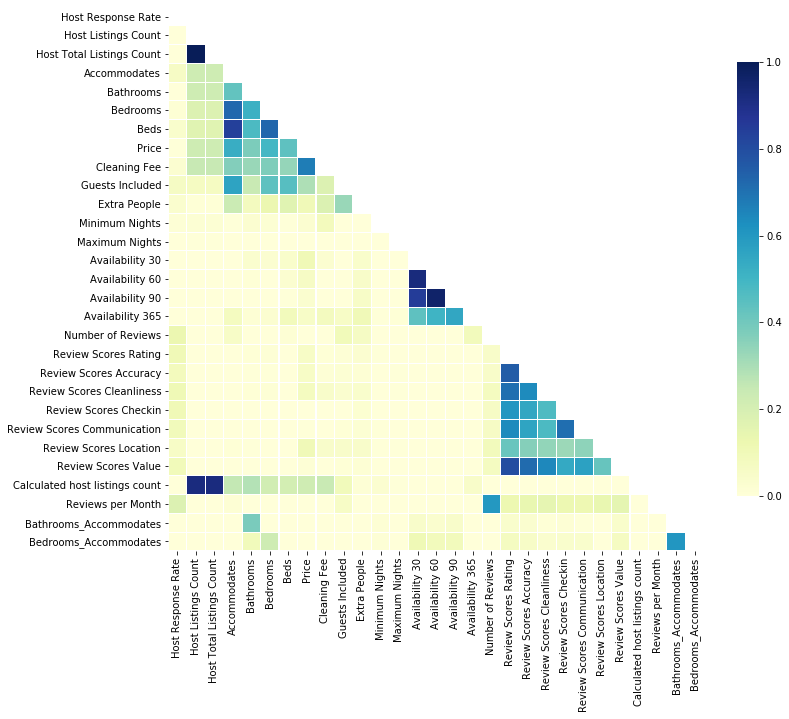

In [15]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

### Vemos que hay algunas muy relacionadas
- Host Listings Count, Host Total Listings Count y Calculated Host Listings Count. me quedo con Host Listings Count.
- Availability 30, Availability 60 y Availability 90. Me quedo con Avairability 90
- Beds y Accomodates. Me quedo con Accomodates

In [16]:
df_train.drop(['Host Total Listings Count','Calculated host listings count'], axis=1, inplace=True)
df_train.drop(['Availability 30','Availability 60'], axis=1, inplace=True)
df_train.drop(['Beds'], axis=1, inplace=True)

### Observación variables categóricas

In [17]:
df_train[df_train.dtypes[(df_train.dtypes!="float64")&(df_train.dtypes!="int64")].index].describe().T

,count,unique,top,freq
Name,11823,11523,Apartamento en el centro de Madrid,12
Summary,11355,10686,"Unique apartment in vibrant neighborhoods, car...",53
Space,8718,8200,Los Apartamentos Good Stay Prado se encuentran...,22
Description,11818,11459,Es un piso con 6 habitaciones de las que 5 ha...,16
Experiences Offered,11824,5,none,11810
Neighborhood Overview,7309,6426,Se trata de una de las zonas más emblemáticas ...,30
Transit,7243,6353,"It is calm, quite zone and you don’t have to s...",36
Access,6663,5781,"Wifi, TV, washing machine, Microwave, full equ...",48
Interaction,6594,5375,We will arrange the check in time depending on...,51
House Rules,7681,6494,Checkin is done at our office. The address: Ca...,74


### Comprobamos la columna city

In [18]:
df_train['City'].value_counts(dropna=False)

Madrid                      10567
Barcelona                     235
London                        104
Paris                          85
Palma                          44
                            ...  
Cala Anguila-Cala Mendia        1
Sint-Gillis                     1
Queenscliff                     1
Bondi Junction                  1
Oakland                         1
Name: City, Length: 223, dtype: int64

### Vamos a poner solo los valores que contengan Madrid

In [19]:
df_train[df_train['City'].str.contains("Madrid", na=False)]
df_train.drop(df_train[~df_train['City'].str.contains("Madrid", na=False)].index ,axis=0, inplace=True)

In [20]:
df_train['City'].value_counts(dropna=False)

Madrid                                 10567
Madrid, Comunidad de Madrid, ES           14
Delicias-Madrid                            1
Madrid, Comunidad de Madrid, ESPANA        1
Chueca, Madrid                             1
Aravaca (Madrid)                           1
Name: City, dtype: int64

### Nos hemos quedado con los datos de Madrid y ya podemos eliminar las columnas city, state y country.

In [21]:
df_train.drop(['City' , 'State', 'Country'], axis=1, inplace=True)

### Vamos a eliminar las variables categóricas que creo que no me van a aportar nada


In [22]:
df_train.drop(['Name','Summary','Space','Description','Experiences Offered','Neighborhood Overview','Transit','Interaction','House Rules','Host Name','Host Location','Host About','Host Neighbourhood','Host Verifications','Street','Neighbourhood Cleansed','Market','Smart Location','Country Code','Amenities','Access'], axis=1, inplace=True)

### Observamos que Bed Type tiene la mayoría de valores iguales y no me van a aportar mucho

In [23]:
df_train['Bed Type'].value_counts(dropna=False)

Real Bed         10351
Pull-out Sofa      186
Futon               30
Couch               13
Airbed               5
Name: Bed Type, dtype: int64

In [24]:
df_train.drop(['Bed Type'], axis=1, inplace=True)

### Columnas que nos quedan:

In [25]:
dato =df_train.isna().sum ()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Host Response Rate              1314
Host Listings Count                3
Neighbourhood                   3542
Neighbourhood Group Cleansed       0
Zipcode                          348
Property Type                      0
Room Type                          0
Accommodates                       0
Bathrooms                         40
Bedrooms                          18
Price                              8
Cleaning Fee                    4295
Guests Included                    0
Extra People                       0
Minimum Nights                     0
Maximum Nights                     0
Availability 90                    0
Availability 365                   0
Number of Reviews                  0
Review Scores Rating            2289
Review Scores Accuracy          2305
Review Scores Cleanliness       2300
Review Scores Checkin           2311
Review Scores Communication     2301
Review Scores Location          2314
Review Scores Value             2313
Cancellation Policy                0
R

###  Representamos el histograma de las variables numéricas

In [26]:
metric_columns=df_train.dtypes[(df_train.dtypes=="float64")|(df_train.dtypes=="int64")].index.values.tolist()
attributes_columns=df_train.dtypes[(df_train.dtypes!="float64")&(df_train.dtypes!="int64")].index.values.tolist()

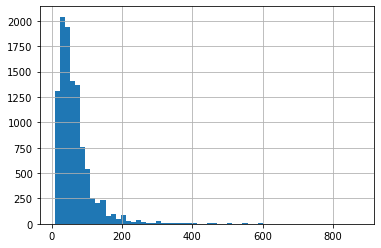

In [27]:
df_train['Price'].hist(log=False, density=False, bins= 60)

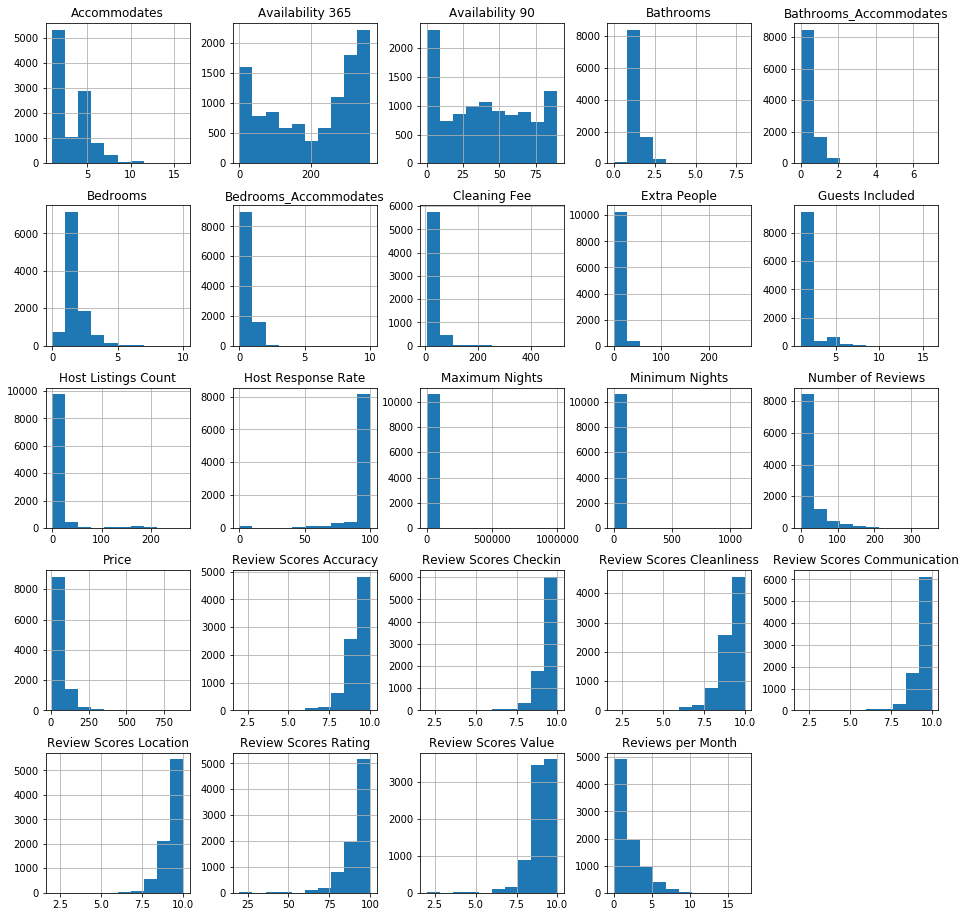

In [28]:
df_train[metric_columns].hist(figsize=[16,16])
plt.show()

### Vemos que alguna variable está muy desplazada a los laterales, podemos hacer transformaciones para mejorar el modelo

### Intentamos mejorar con una transformacion logarítmica

In [29]:
for col in metric_columns:
    df_train[col] = df_train[col].astype('float64').replace(0.0, 0.01)
    df_train[col] = np.log(df_train[col])

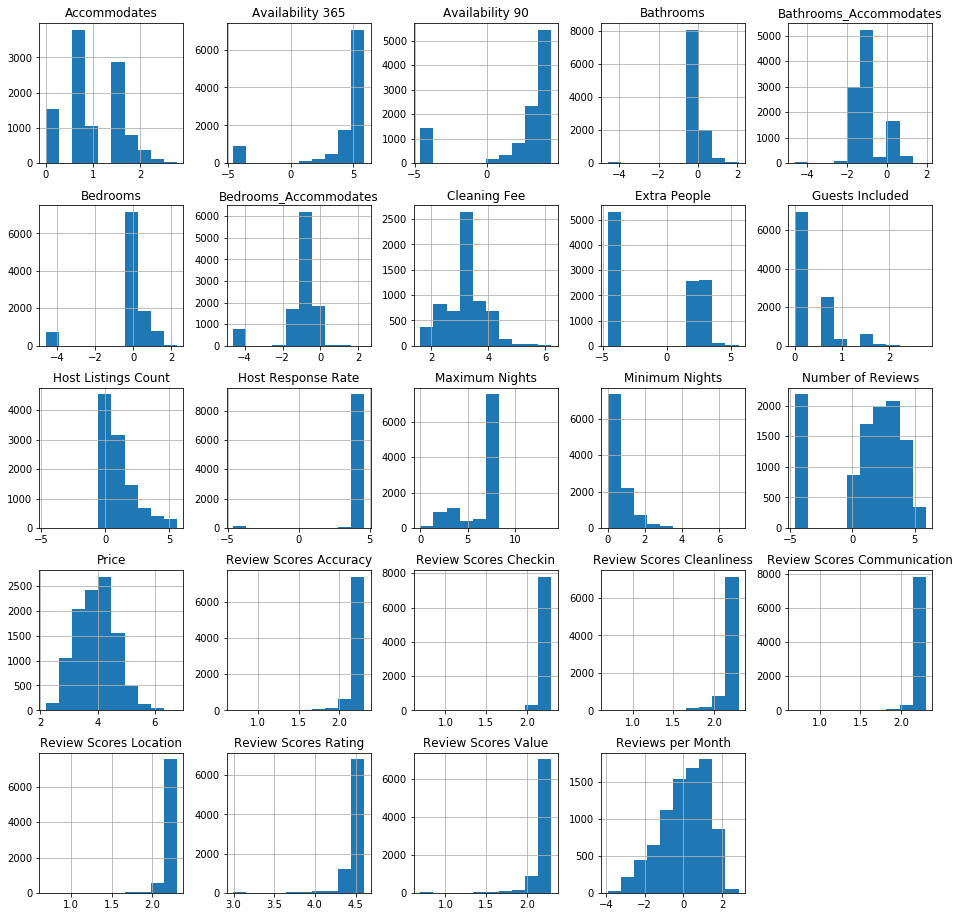

In [30]:
df_train[metric_columns].hist(figsize=(16,16));

### Al observar las gráficas voy a eliminar todos los review, menos review per Mont

In [31]:
df_train.drop(['Review Scores Accuracy','Review Scores Checkin','Review Scores Cleanliness','Review Scores Communication','Review Scores Location','Review Scores Rating','Review Scores Value'], axis=1, inplace=True)

### Imputamos valores
A continuación imputamos con más apariciones.

In [32]:
df_most_common_imputed = df_train.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_most_common_imputed
df_train = df_most_common_imputed;

# diccionario con el valor más común
missings_dic_train = df_train.apply(lambda x: x.value_counts().index[0]).to_dict()

### Codificación de variables categóricas
Se ha utilizado Mean Encoding.

In [33]:
def mean_Encoding(df, by, on, m):
    mean = df[on].mean()

    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    smooth = (counts * means + m * mean) / (counts + m)

    return (df[by].map(smooth), smooth.to_dict())

In [34]:
metric_columns=df_train.dtypes[(df_train.dtypes=="float64")|(df_train.dtypes=="int64")].index.values.tolist()
attributes_columns=df_train.dtypes[(df_train.dtypes!="float64")&(df_train.dtypes!="int64")].index.values.tolist()
encoder_dic_train ={}

for col in attributes_columns: 
    df_train[col], encoder_dic_train[col] = mean_Encoding(df_train, by=col, on='Price', m=10)

### Estandarización

La estandarización de las variables del dataset puede mejorar el rendimiento de muchos modelos.

In [35]:
from sklearn import preprocessing
y_train = df_train['Price']     # nos quedamos con la objetivo, price
X_train = df_train.loc[:, df_train.columns != 'Price']      # nos quedamos con el resto
feature_names = df_train.columns[df_train.columns!='Price']

# Escalamos
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [36]:
X_train.describe().T
X_train.shape, y_train.shape, feature_names.shape

((10585, 23), (10585,), (23,))

### Hacemos los cambios y transformaciones en el dataset de test igual que hicimos en el de train.

In [37]:
df_test.drop(['ID', 'Listing Url','Scrape ID','Last Scraped', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Since', 'Host Response Time', 'Host Thumbnail Url', 'Host Picture Url' , 'Calendar Updated', 'First Review', 'Last Review','Calendar last Scraped'], axis=1, inplace=True)
df_test.drop(['Host Acceptance Rate','Notes','Square Feet','Has Availability','License','Jurisdiction Names','Weekly Price','Monthly Price','Security Deposit'], axis=1, inplace=True)
df_test.drop(['Latitude','Longitude','Geolocation'], axis=1, inplace=True)
df_test['Bathrooms_Accommodates']=df_test['Bathrooms']/df_test['Accommodates']
df_test['Bedrooms_Accommodates']=df_test['Bedrooms']/df_test['Accommodates']
df_test.drop(['Host Total Listings Count','Calculated host listings count'], axis=1, inplace=True)
df_test.drop(['Availability 30','Availability 60'], axis=1, inplace=True)
df_test.drop(['Beds'], axis=1, inplace=True)
df_test[df_test['City'].str.contains("Madrid", na=False)]
df_test.drop(df_test[~df_test['City'].str.contains("Madrid", na=False)].index ,axis=0, inplace=True)
df_test.drop(['City' , 'State', 'Country'], axis=1, inplace=True)
df_test.drop(['Name','Summary','Space','Description','Experiences Offered','Neighborhood Overview','Transit','Interaction','House Rules','Host Name','Host Location','Host About','Host Neighbourhood','Host Verifications','Street','Neighbourhood Cleansed','Market','Smart Location','Country Code','Amenities','Access'], axis=1, inplace=True)
df_test.drop(['Bed Type'], axis=1, inplace=True)
# Transformación logarítmica de columnas
metric_columns_test=df_test.dtypes[(df_test.dtypes=="float64")|(df_test.dtypes=="int64")].index.values.tolist()
attributes_columns_test=df_test.dtypes[(df_test.dtypes!="float64")&(df_test.dtypes!="int64")].index.values.tolist()
for col in metric_columns_test:
    df_test[col] = df_test[col].astype('float64').replace(0.0, 0.01)
    df_test[col] = np.log(df_test[col])
df_test.drop(['Review Scores Accuracy','Review Scores Checkin','Review Scores Cleanliness','Review Scores Communication','Review Scores Location','Review Scores Rating','Review Scores Value'], axis=1, inplace=True)
df_test.fillna(value=missings_dic_train, inplace=True)
###################################################################
print(f'Dimensiones del dataset de training: {df_train.shape}')
print(f'Dimensiones del dataset de test: {df_test.shape}')

Dimensiones del dataset de training: (10585, 24)
Dimensiones del dataset de test: (2649, 24)


In [38]:
# Codificación de variables categóricas
attributes_columns_test=df_test.dtypes[(df_test.dtypes!="float64")&(df_test.dtypes!="int64")].index.values.tolist()
for col in attributes_columns: 
    df_test[col] = df_test[col].map(encoder_dic_train[col]).fillna(df_train[col].mean())

In [39]:
# Escalado
y_test = df_test['Price']     # nos quedamos con la objetivo, price
X_test = df_test.loc[:, df_test.columns != 'Price']      # nos quedamos con el resto
feature_names_test = df_test.columns[df_test.columns!='Price']

# Normalización/escalado con los datos de training
XtestScaled = scaler.transform(X_test) 

In [40]:
print(f'Dimensiones datos para train: Xtrain = {X_train.shape}, ytrain = {y_train.shape}')
print(f'Dimensiones datos para test: Xtest = {X_test.shape}, ytest = {y_test.shape}')

Dimensiones datos para train: Xtrain = (10585, 23), ytrain = (10585,)
Dimensiones datos para test: Xtest = (2649, 23), ytest = (2649,)


### Lasso

best mean cross-validation score: -0.131
best parameters: {'alpha': 6.158482110660255e-05}


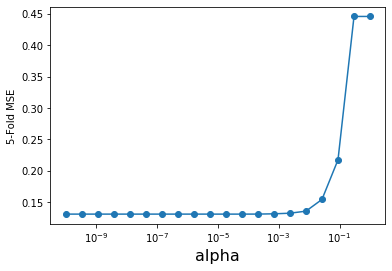

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

alpha_vector = np.logspace(-10,0,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [42]:
feature_names = X_train.columns[0:]


alpha_optimo = grid.best_params_['alpha']*10
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print ('R^2 train =', round (lasso.score(X_train, y_train), 4))
print ('R^2 test =', round (lasso.score(X_test, y_test), 4))
w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

RMSE Modelo Lasso (train): 0.361
RMSE Modelo Lasso (test) : 0.366
R^2 train = 0.7073
R^2 test = 0.7033
Host Response Rate -0.0052790113455129795
Host Listings Count -0.021977253884794854
Neighbourhood 0.1500124555964946
Neighbourhood Group Cleansed 0.18953511497188558
Zipcode 0.3724987970040431
Property Type -0.08887091896069589
Room Type 0.6037875803446132
Accommodates 0.43079821173635696
Bathrooms 0.08262279690966337
Bedrooms -0.0393436850147395
Cleaning Fee 0.1714408256224731
Guests Included 0.13543018480791985
Extra People -0.02592211230959791
Minimum Nights -0.03047412019841391
Maximum Nights -0.0005372994156047075
Availability 90 0.011643650470866093
Availability 365 0.011528935994239636
Number of Reviews -0.025421223808362862
Cancellation Policy -0.02284868474929905
Reviews per Month -0.049947905108103256
Features 0.20573770083302614
Bathrooms_Accommodates 0.0
Bedrooms_Accommodates 0.10242970455159012


In [43]:
#Características que se pueden eliminar
for f,wi in zip(feature_names,w):
    if (wi==0):
        print(f)

Bathrooms_Accommodates


Podríamos eliminar la columna Bathrooms_Accommodates al salir coeficiente 0, pero no creo que cambie mucho el modelo y lo dejamos como está de momento.

## Árbol de regresión

best mean cross-validation score: 0.708
best parameters: {'max_depth': 8}


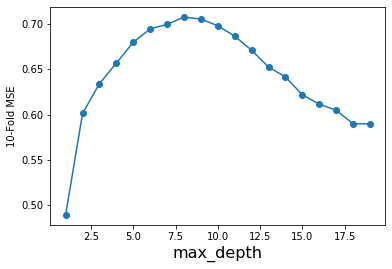

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [45]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

ytrainarbol = treeModel.predict(X_train)
ytestarbol = treeModel.predict(X_test)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 train =', round (treeModel.score(X_train, y_train), 4))
print ('R^2 test =', round (treeModel.score(X_test, y_test), 4))

RMSE Modelo  (train): 0.306
RMSE Modelo  (test) : 0.37
R^2 train = 0.7893
R^2 test = 0.6965


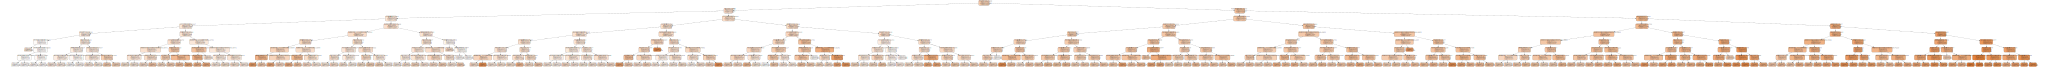

In [46]:
import graphviz
dot_data = tree.export_graphviz(treeModel, out_file=None, 
                         feature_names=feature_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

Hemos conseguido peores prestaciones que Lasso, de momento nos quedamos con Lasso

## Ramdom Forest

best mean cross-validation score: 0.779
best parameters: {'max_depth': 14}


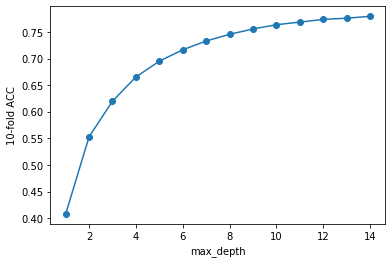

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
cv = 10

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=cv, n_jobs=4) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel(f'{cv}-fold ACC')

plt.show()

In [48]:
maxDepthOptimo = grid.best_params_['max_depth']
#bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=600,max_features='sqrt').fit(X_train,y_train)
bagModel = RandomForestRegressor(max_depth=12,n_estimators=600,max_features='sqrt').fit(X_train,y_train)
ytrainarbol = bagModel.predict(X_train)
ytestarbol = bagModel.predict(X_test)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 train =', round (bagModel.score(X_train, y_train), 4))
print ('R^2 test =', round (bagModel.score(X_test, y_test), 4))


RMSE Modelo  (train): 0.241
RMSE Modelo  (test) : 0.324
R^2 train = 0.8693
R^2 test = 0.7663


Características más importantes 

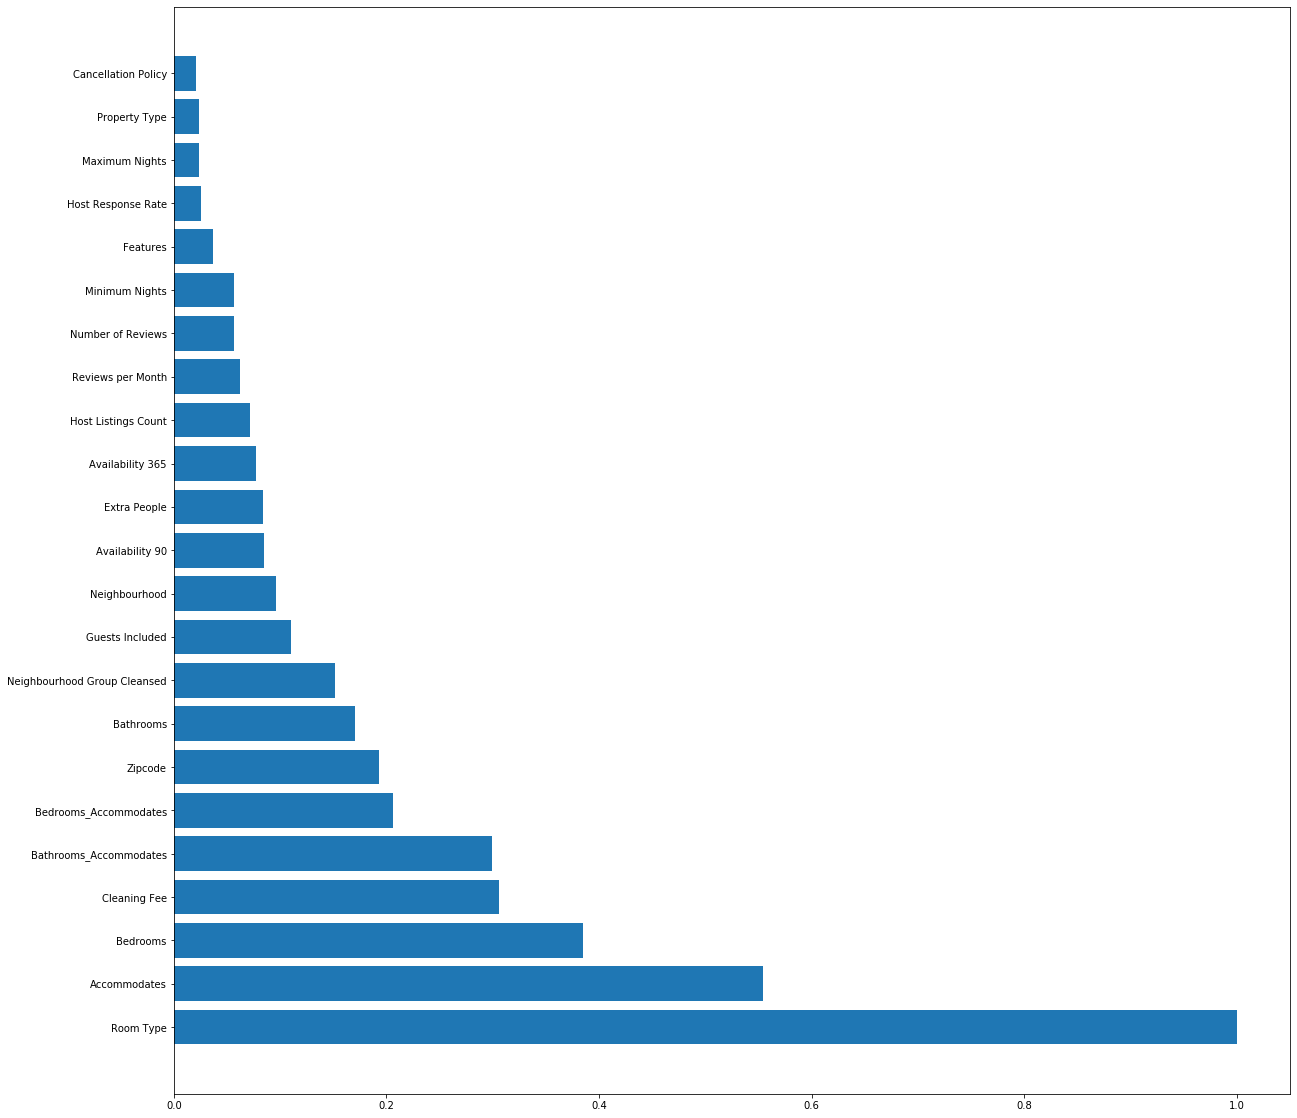

In [49]:
feature_names = X_train.columns[0:]
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20,20))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [50]:
feature_names[indices[0:10]]

Index(['Room Type', 'Accommodates', 'Bedrooms', 'Cleaning Fee',
       'Bathrooms_Accommodates', 'Bedrooms_Accommodates', 'Zipcode',
       'Bathrooms', 'Neighbourhood Group Cleansed', 'Guests Included'],
      dtype='object')

Vemos que Ramdom forest ha mejorado a Lasso, aunque viendo el valor de las variables podríamos mejorar el modelo eliminando algunas.

## Boosted Trees

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
cv = 5

Niterations = [200, 250, 500,1000] 
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = cv, n_jobs=4)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.785
best parameters: {'learning_rate': 0.1, 'n_estimators': 1000}


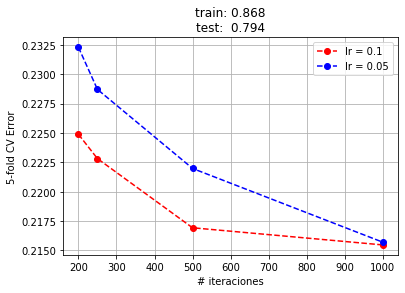

In [52]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lRateOptimo, n_estimators=nEstimatorsOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel(f'{cv}-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [53]:
ytrainarbol = bt.predict(X_train)
ytestarbol = bt.predict(X_test)

mseTrainModelarbol = mean_squared_error(y_train,ytrainarbol)
mseTestModelarbol = mean_squared_error(y_test,ytestarbol)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelarbol))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelarbol))

print ('R^2 train =', round (bt.score(X_train, y_train), 4))
print ('R^2 test =', round (bt.score(X_test, y_test), 4))

RMSE Modelo  (train): 0.243
RMSE Modelo  (test) : 0.304
R^2 train = 0.8675
R^2 test = 0.7942


Dejamos max_depth a 3, ya que no mejoraba al subirlo.

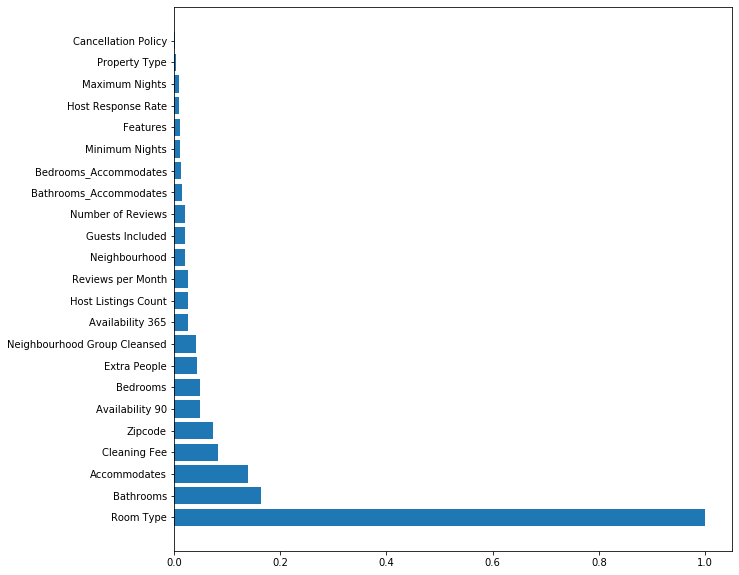

In [54]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Vemos que Boosted Trees ha mejorado a Ramdom Forest, además observamos muchas variables con poca importancia que podríamos eliminar.

## SVM (Support Vector Machine)

In [55]:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 10, verbose=1, n_jobs=4)
#X_train ya está escalado
grid.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   59.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 36.1min
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed: 36.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

best mean cross-validation score: 0.767
best parameters: {'C': 35.93813663804626, 'gamma': 0.003727593720314938}


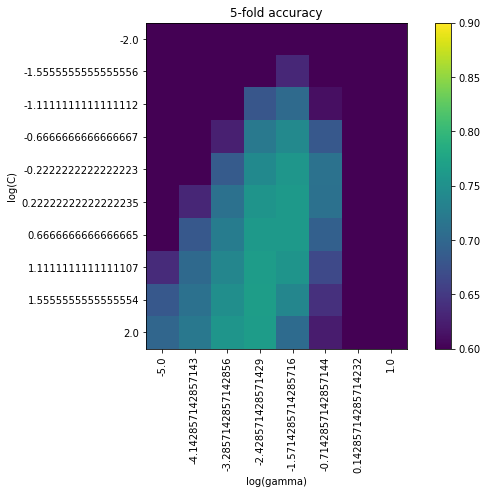

In [56]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [57]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']
svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(X_train,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(X_test,y_test))

Acc (TEST): 0.77


In [58]:
ytrainSVR = svmModel.predict(X_train)
ytestSVR = svmModel.predict(X_test)

mseTrainModelSVR = mean_squared_error(y_train,ytrainSVR)
mseTestModelSVR = mean_squared_error(y_test,ytestSVR)

print('RMSE Modelo  (train): %0.3g' % np.sqrt(mseTrainModelSVR))
print('RMSE Modelo  (test) : %0.3g' % np.sqrt(mseTestModelSVR))

print ('R^2 train =', round (svmModel.score(X_train, y_train), 4))
print ('R^2 test =', round (svmModel.score(X_test, y_test), 4))

RMSE Modelo  (train): 0.307
RMSE Modelo  (test) : 0.324
R^2 train = 0.7881
R^2 test = 0.7671


El resultado ha sido un poco peor que Boosted Trees, así que en definitiva el modelo que mejor me ha funcionado ha sido Boosted Trees

In [59]:
print ('Lasso')
print ('R^2 train =', round (lasso.score(X_train, y_train), 4))
print ('R^2 test =', round (lasso.score(X_test, y_test), 4))
print ('====================')
print ('Arbol de regresion')
print ('R^2 train =', round (treeModel.score(X_train, y_train), 4))
print ('R^2 test =', round (treeModel.score(X_test, y_test), 4))
print ('====================')
print ('Ramdom Forest')
print ('R^2 train =', round (bagModel.score(X_train, y_train), 4))
print ('R^2 test =', round (bagModel.score(X_test, y_test), 4))
print ('====================')
print ('Boosted Trees')
print ('R^2 train =', round (bt.score(X_train, y_train), 4))
print ('R^2 test =', round (bt.score(X_test, y_test), 4))
print ('====================')
print ('SVM (Support Vector Machine)')
print ('R^2 train =', round (svmModel.score(X_train, y_train), 4))
print ('R^2 test =', round (svmModel.score(X_test, y_test), 4))

Lasso
R^2 train = 0.7073
R^2 test = 0.7033
Arbol de regresion
R^2 train = 0.7893
R^2 test = 0.6965
Ramdom Forest
R^2 train = 0.8693
R^2 test = 0.7663
Boosted Trees
R^2 train = 0.8675
R^2 test = 0.7942
SVM (Support Vector Machine)
R^2 train = 0.7881
R^2 test = 0.7671


## Conclusión
Observamos que el mejor modelo es Boosted Trees, aunque podríamos mejorar los resultados:
- quitando los outliers
- eliminando alguna variable que no sea relevante
- creando nuevas variables que mejoren el modelo